# Area 51 to try out code

In [1]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())

sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

compute-a-16-151.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


### The classic example:
Should be LL -26156.062 with params 

ibd_in=0.0005
ibd_out=0.001
ibd_jump=0.05

In [2]:
%%time
h = HMM_Full(folder_in="./output/simulated/undermodel/sim2a/", l_model="simulated", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast", p_model="None",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 0.0005, ibd_out = 0.001, ibd_jump = 0.05, max_gap=1.0)
post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 9999.0000 Morgan
Gaps bigger than 0.1 cM: 9999
Maximum Gap: 100.0000 cM
Upper Gap Cutoff: 100.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 110.125056 mB
Total Log likelihood: -26156.062
CPU times: user 146 ms, sys: 10.5 ms, total: 156 ms
Wall time: 155 ms


In [3]:
r_vec

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03])

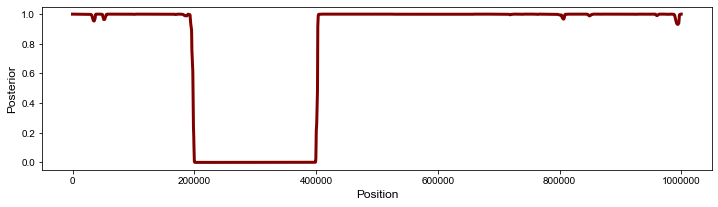

In [7]:
plot_posterior(post=post, state=0, fs_l=12, show=True)

Saved to ./figs/dumpster/5state_simulated.png


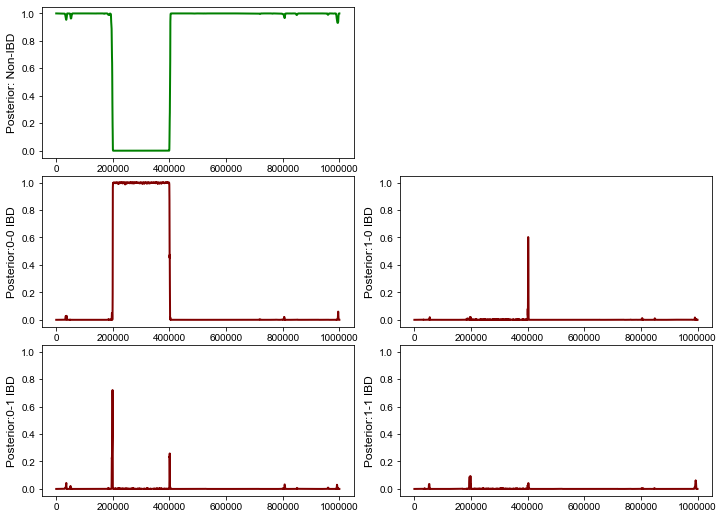

In [8]:
plot_posterior_panel(post=post, savepath="./figs/dumpster/5state_simulated.png", lw=2)

Saved to ./figs/dumpster/5state_simulated_zoom.png


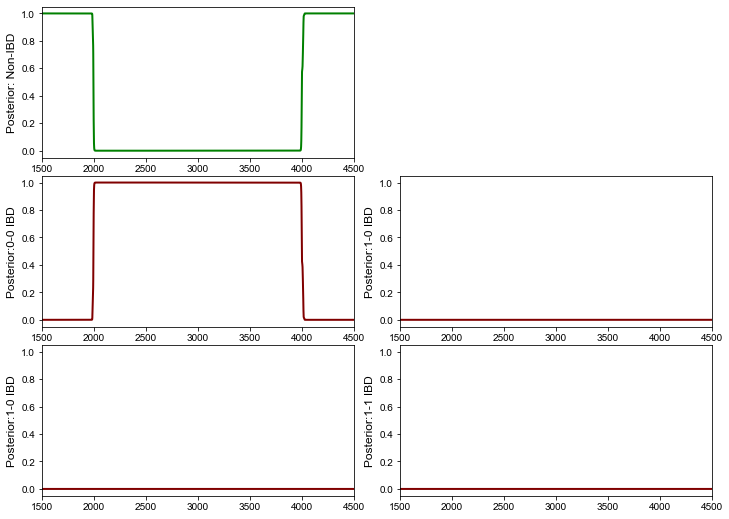

In [8]:
plot_posterior_panel(post=post, savepath="./figs/dumpster/5state_simulated_zoom.png", 
                     xlim=[1500,4500], lw=2)

# Run full hdf5 example [Real ancient Data!]

In [9]:
%%time
h = HMM_Full(folder_in="./data/hdf5/1240k_v43/ch", l_model="hdf5", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast", p_model="hapROH",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 1, ibd_out = 1, ibd_jump = 500)
h.l_obj.set_params(iids=["COR001", "COR002"], ch=8)
h.p_obj.set_params(iid="COR001_COR002", ch=8, folder="./output/empirical/test/COR001_COR002/", save=2, 
                   ibd_min_l=0.02, max_gap = 0.01, cutoff_post=0.9,merge=True)
post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()
df_ibd, _, _ = h.p_obj.call_roh(r_vec, post)

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 1.6800 Morgan
Gaps bigger than 0.1 cM: 133
Maximum Gap: 1.8932 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 184.090624 mB
Total Log likelihood: -134450.631
Fraction Markers above IBD cutoff: 0.9473
Merged n=0 gaps < 0.01 M
Called n=5 IBD Blocks > 2.0 cM
Longest Block: 115.37 cM
Successfully saved output to ./output/empirical/test/COR001_COR002/
Fraction Markers above IBD cutoff: 0.9473
Merged n=0 gaps < 0.01 M
Called n=5 IBD Blocks > 2.0 cM
Longest Block: 115.37 cM
Successfully saved output to ./output/empirical/test/COR001_COR002/
CPU times: user 1.32 s, sys: 70.4 ms, total: 1.39 s
Wall time: 2.75 s


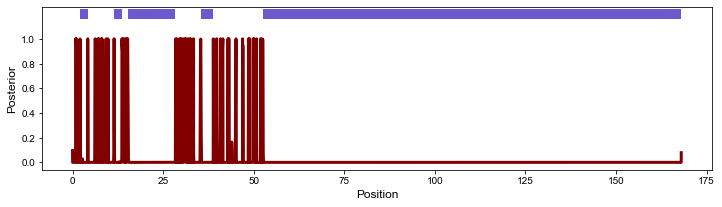

In [10]:
plot_posterior(post=post, morgan=r_vec, min_cm=2, df_ibd=df_ibd, fs_l=12, show=True)

Saved to ./figs/dumpster/COR001_COR002_IBD_ch8.png


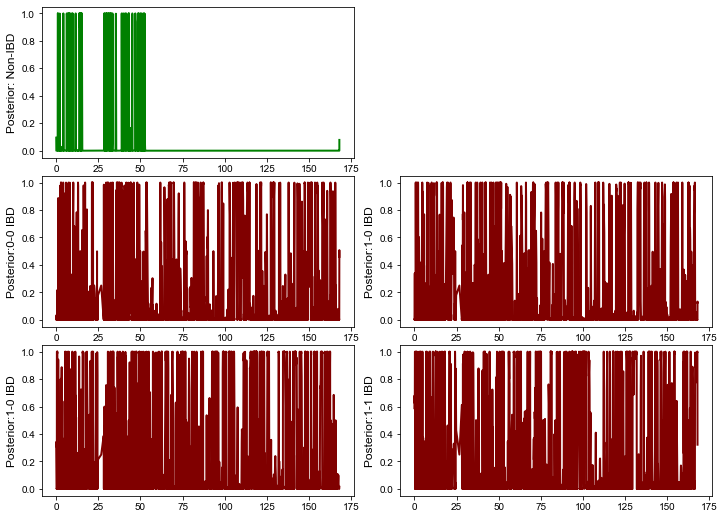

In [3]:
plot_posterior_panel(post=post, savepath="./figs/dumpster/COR001_COR002_IBD_ch8.png", ch=8, xlim=[],
                     lw=2)

In [12]:
df = pd.read_csv("./output/empirical/test/SUC002_SUC005/ibd.tsv", sep="\t")

# Test total likelihoods

In [3]:
%%time
jrts = np.logspace(2, 3, num=20)

h = HMM_Full(folder_in="./data/hdf5/1240k_v43/ch", l_model="hdf5", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast",
                 output=False, load=True)
lls = np.zeros(len(jrts),dtype="float")

for i,jrt in enumerate(jrts):
    h.t_obj.set_params(ibd_in = 1, ibd_out = 10, ibd_jump = jrt)
    h.l_obj.set_params(iids=["SUC002", "SUC003"], ch=4)
    _, _, _, _, tot_ll = h.run_fwd_bwd()
    lls[i] = tot_ll

CPU times: user 7.96 s, sys: 145 ms, total: 8.11 s
Wall time: 9.64 s


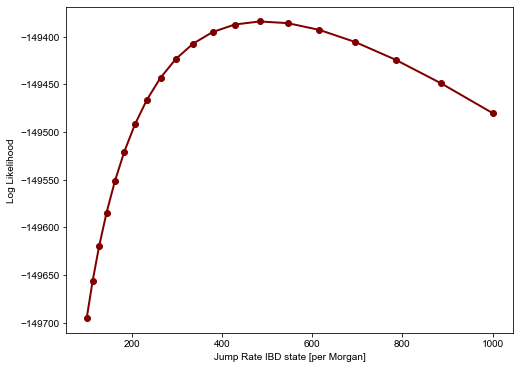

In [13]:
plt.figure(figsize=(8,6))
ax=plt.gca()
ax.plot(jrts, lls,"o-", color="maroon", lw=2)
ax.set_xscale("linear")
ax.set_xlabel("Jump Rate IBD state [per Morgan]")
ax.set_ylabel("Log Likelihood")
plt.show()

In [121]:
i=np.argmax(lls)
jrts[i]

483.2930238571752

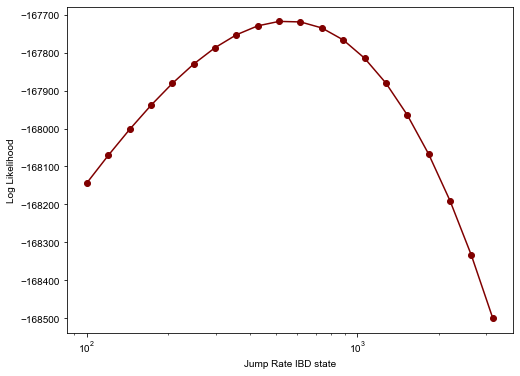

In [112]:
plt.figure(figsize=(8,6))
ax=plt.gca()
ax.plot(jrts,lls,"o-", color="maroon")
ax.set_xscale("log")
ax.set_xlabel("Jump Rate IBD state")
ax.set_ylabel("Log Likelihood")
plt.show()

In [117]:
i=np.argmax(lls)
jrts[i]

2636.650898730358